##  🍿🎥🍿🍿🍿Movie rating prediction 🎬🎬🎦🎦🍿🍿


In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', 30) # Set max columns to 30 of pandas DataFrame.

In [3]:
movies_column_names =['MovieID','MovieName','Genres']
movies = pd.read_csv("movies.dat", sep="::",encoding='latin-1', names=movies_column_names)


C:\Users\Jarvis\AppData\Local\Temp\ipykernel_26636\2206574889.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("movies.dat", sep="::",encoding='latin-1', names=movies_column_names)


In [4]:
# Perform one-hot encoding on the "Genres" column
genres_encoded = movies['Genres'].str.get_dummies()

# Concatenate the encoded genres with the original data frame
movies = pd.concat([movies, genres_encoded], axis=1)

movies.drop("Genres",axis=1, inplace=True)

In [5]:
movies.head()

,MovieID,MovieName,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
movies.rename(columns = {"Children's":'Children'}, inplace = True) # Rename Children's column to Children

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MovieID      3883 non-null   int64 
 1   MovieName    3883 non-null   object
 2   Action       3883 non-null   int64 
 3   Adventure    3883 non-null   int64 
 4   Animation    3883 non-null   int64 
 5   Children     3883 non-null   int64 
 6   Comedy       3883 non-null   int64 
 7   Crime        3883 non-null   int64 
 8   Documentary  3883 non-null   int64 
 9   Drama        3883 non-null   int64 
 10  Fantasy      3883 non-null   int64 
 11  Film-Noir    3883 non-null   int64 
 12  Horror       3883 non-null   int64 
 13  Musical      3883 non-null   int64 
 14  Mystery      3883 non-null   int64 
 15  Romance      3883 non-null   int64 
 16  Sci-Fi       3883 non-null   int64 
 17  Thriller     3883 non-null   int64 
 18  War          3883 non-null   int64 
 19  Western      3883 non-null 

In [8]:
ratings_column_names =['UserID','MovieID','Rating','Timestamp']
ratings = pd.read_csv("./ratings.dat",sep="::",encoding="latin-1",names=ratings_column_names)

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_26636\4202593100.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("./ratings.dat",sep="::",encoding="latin-1",names=ratings_column_names)


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [10]:
users_column_names = ["UserID","Gender","Age","Occupation","Zip-code"]
users = pd.read_csv("./users.dat", sep="::", encoding="latin-1" , names=users_column_names)

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_26636\2058214005.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("./users.dat", sep="::", encoding="latin-1" , names=users_column_names)


In [11]:
users =pd.get_dummies(users, columns = ['Gender']) # Convert Gender column form object to int using pandas get_dumie() function

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Age         6040 non-null   int64 
 2   Occupation  6040 non-null   int64 
 3   Zip-code    6040 non-null   object
 4   Gender_F    6040 non-null   uint8 
 5   Gender_M    6040 non-null   uint8 
dtypes: int64(3), object(1), uint8(2)
memory usage: 200.7+ KB


## Occupation column
0: "other" or not specified ,
1: "academic/educator",
2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed".
20: "writer",

In [13]:
movie_ratings = pd.merge(movies, ratings) # merge movies and ratings DataFrames
movie_ratings.head()

,MovieID,MovieName,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,UserID,Rating,Timestamp
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,978824268
1,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,4,978237008
2,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,4,978233496
3,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,9,5,978225952
4,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10,5,978226474


In [14]:
movie_ratings_users = pd.merge(movie_ratings, users) # this is our final Dataset

In [15]:
movie_ratings_users.columns


Index(['MovieID', 'MovieName', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'UserID', 'Rating', 'Timestamp', 'Age', 'Occupation',
       'Zip-code', 'Gender_F', 'Gender_M'],
      dtype='object')

In [16]:
df = movie_ratings_users.groupby("MovieID")[ 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Age',
       'Gender_F', 'Gender_M','Rating'].mean()

C:\Users\Jarvis\AppData\Local\Temp\ipykernel_26636\4011028961.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = movie_ratings_users.groupby("MovieID")[ 'Action', 'Adventure', 'Animation',


In [17]:
df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Age,Gender_F,Gender_M,Rating
MovieID,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.700530,0.284545,0.715455,4.146846
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.800285,0.251070,0.748930,3.201141
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,29.276151,0.284519,0.715481,3.016736
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.788235,0.500000,0.500000,2.729412
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.425676,0.364865,0.635135,3.006757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.737819,0.267981,0.732019,3.635731
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.203947,0.263158,0.736842,4.115132
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.851852,0.185185,0.814815,3.666667


<Axes: >

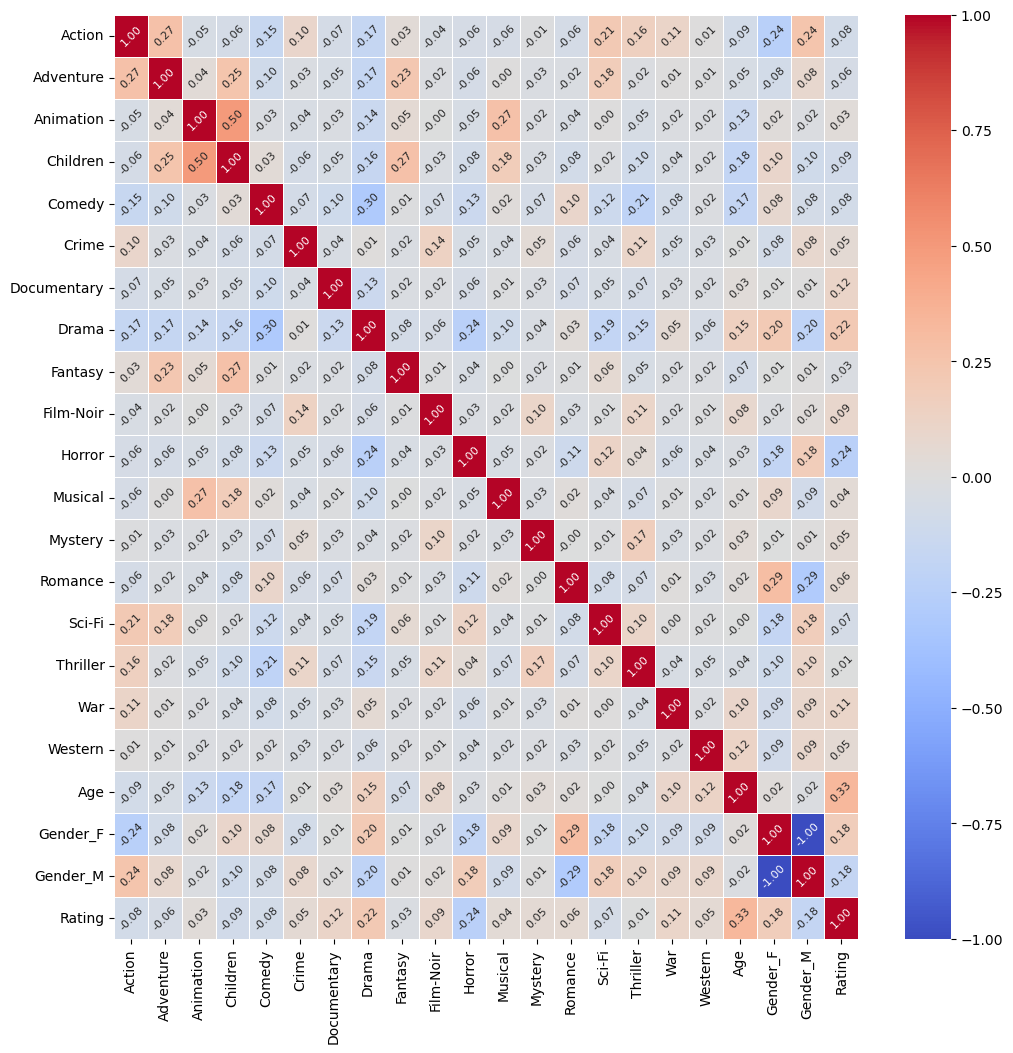

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', fmt='.2f', annot_kws={'fontsize': 8, 'rotation': 45}, ax=ax, linewidths=.5)


In [19]:
X = df.drop(['Rating'], axis=1)
y = df["Rating"]



In [22]:
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


# # Create and train the model
# models = svr = SVR(kernel='poly')
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)


models = {
          'Lin_Reg':LinearRegression(), 
          'Decision_tree': DecisionTreeRegressor(),
          'KNN':KNeighborsRegressor(n_neighbors= 5),
          'SVM_poly':SVR(kernel='poly'),
          'SVM_linear':SVR(kernel='rbf')
        }
for model_name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2_score_value = r2_score(y_test, y_pred,multioutput='variance_weighted')
    print(f"{model_name} Mean Squared Error (MSE): {round(mse,3)}")
    print(f"{model_name} Root Mean Squared Error (RMSE): {round(rmse,3)}")
    print(f"{model_name} R2 score:{r2_score_value}")
    print("--------------------------------------------------------")


Lin_Reg Mean Squared Error (MSE): 0.369
Lin_Reg Root Mean Squared Error (RMSE): 0.608
Lin_Reg R2 score:0.2233191002856555
--------------------------------------------------------
Decision_tree Mean Squared Error (MSE): 0.614
Decision_tree Root Mean Squared Error (RMSE): 0.784
Decision_tree R2 score:-0.29199301040554393
--------------------------------------------------------
KNN Mean Squared Error (MSE): 0.384
KNN Root Mean Squared Error (RMSE): 0.62
KNN R2 score:0.19249989746694596
--------------------------------------------------------
SVM_poly Mean Squared Error (MSE): 0.419
SVM_poly Root Mean Squared Error (RMSE): 0.647
SVM_poly R2 score:0.1192556606858809
--------------------------------------------------------
SVM_linear Mean Squared Error (MSE): 0.346
SVM_linear Root Mean Squared Error (RMSE): 0.589
SVM_linear R2 score:0.271698635536857
--------------------------------------------------------
